# Loan Data Presentation
## by Tarek Elsayed

## Investigation Overview

> The goal of the investigation is to dive deeper into loan data to understand the underlying factors affecting Borrower rate as well as Loan original amount.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df['EmploymentStatus'].replace('Other', np.NaN, inplace = True);

In [4]:
default_color = sb.color_palette()[0]

## Distribution of the borrower's interest rates in the dataset
> In the case of Borrowers's interest rate, the distribution looks roughly normal but with an isolated peak at nearly 0.32. The bulk of the interest rate is between 0.12 and 0.2 and the bulk other than the peak looks right skewed.

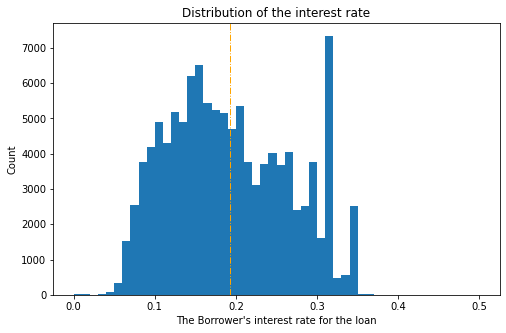

In [5]:
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.axvline(df['BorrowerRate'].mean(), color='orange', linestyle='-.', linewidth=1)
plt.xlabel("The Borrower's interest rate for the loan")
plt.ylabel('Count')
plt.title('Distribution of the interest rate');
plt.show()

## Are most of the borrowers employed? Do they own a house?

>  It stands out that the vast majority of the borrowers in our dataset are employed. Some of them are full-time workers and self-employed. It's also obvious that a very small minority of the borrowers are retired, not employed or part-time workers.

> Interestingly, there is no trend seen in the borrowers when it comes to homeowning, nearly half of the borrowers don't own a house.

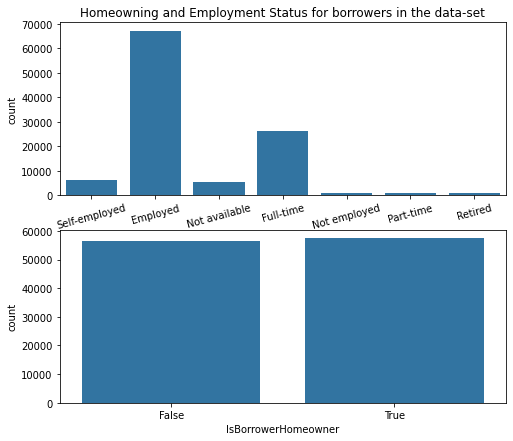

In [6]:
fig, ax = plt.subplots(nrows=2, figsize = [8,7])
default_color = sb.color_palette()[0]
chart = sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=15)
chart.title.set_text('Homeowning and Employment Status for borrowers in the data-set');
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[1])


plt.show()

## Relationship between Term of the loan and its amount

> Loans in this data-set took only 3 values 1, 3 or 5 years. Short term loans (1 year) didn't typically exceed 25k $, whilest 3 and 5 year loans took a larger range of values and reached a maxiumum of 35k.

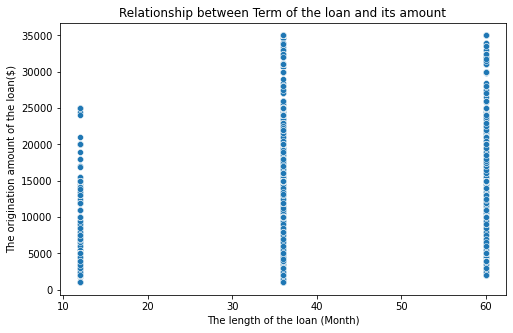

In [7]:
plt.figure(figsize = [8, 5])
sb.scatterplot(data = df, x = 'Term', y = 'LoanOriginalAmount');
plt.ylabel('The origination amount of the loan($)')
plt.xlabel('The length of the loan (Month)')
plt.title('Relationship between Term of the loan and its amount');

## Relationship between Employment Status and Borrower rate
> The figure shows that the unemployed had the highest borrower rates of all other employment status with an average of around 0.25.

> Every other employment status had an average borrower rate of nearly 0.2 with full-time workers slightly lower.

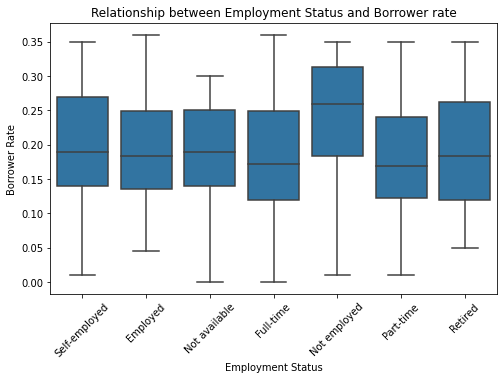

In [8]:
plt.figure(figsize = [8, 5])
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color = default_color)
plt.xticks(rotation=45)
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Employment Status and Borrower rate');
plt.show();

## Effect Total Available credit via bank has on Borrower's interest rate
> It clearly stands out that there is a negative corelation between the 2 variables that is strengthened with more available credit via bank.

> People with more than 50k is their bank acount rarely exceeded an interest rate of 0.20. People with available bank credit less than 5k nearly always got an interest rate of more than 0.10 with wider range of borrower's rates between 0.10 and 0.35.
 

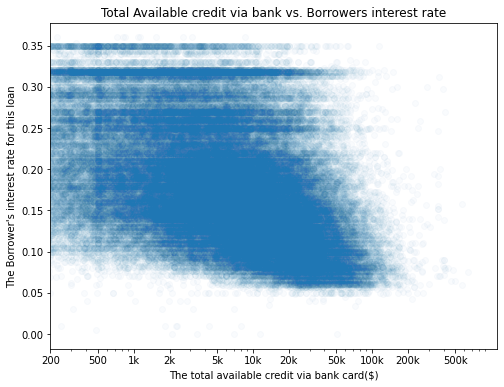

In [9]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, y = 'BorrowerRate', x = 'AvailableBankcardCredit', alpha = 1/40)
plt.ylabel("The Borrower's interest rate for this loan")
plt.xscale('log')
plt.xticks([200,500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5], [200, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k', '500k'])
plt.xlabel('The total available credit via bank card($)')
plt.title('Total Available credit via bank vs. Borrowers interest rate')
plt.show();

## Borrower's rate by Loan original amount and Homeowning
> We can see that Non-homeowners tended to get the vast majority of the small loans with high borrower rates. Their small listings took a large range of borrower rates with most of them from 0.15 to 0.35.

> Homeowners, on the other hand, had most of their small listings with a borrower rate of around 0.3.  

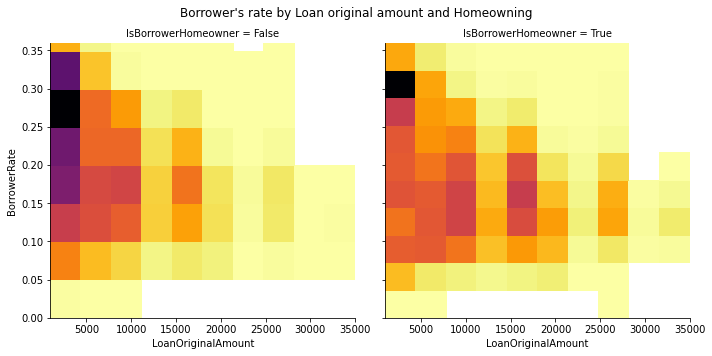

In [10]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)
g = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', size = 5)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerRate', color = 'inferno_r')
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerRate')
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Borrower's rate by Loan original amount and Homeowning")
plt.show()    

In [ ]:
  !jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input --no-prompt